In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1677,2020-09-18,United Kingdom,380592.0,381614.0,41737.0,41705.0,-1022.0,32.0
1678,2020-09-18,Germany,267485.0,267773.0,9381.0,9378.0,-288.0,3.0
1679,2020-09-18,Iran,413488.0,413149.0,23838.0,23808.0,339.0,30.0
1680,2020-09-18,Turkey,297734.0,298039.0,7303.0,7315.0,-305.0,-12.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  10283.325208085613
RMSE =  38348.592870431276


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  309.8478002378121
RMSE =  769.712203578515


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  74593.48427672956
RMSE =  120974.6393593541
-- World performances for deaths --
MAE =  1805.3333333333333
RMSE =  2195.27190906206


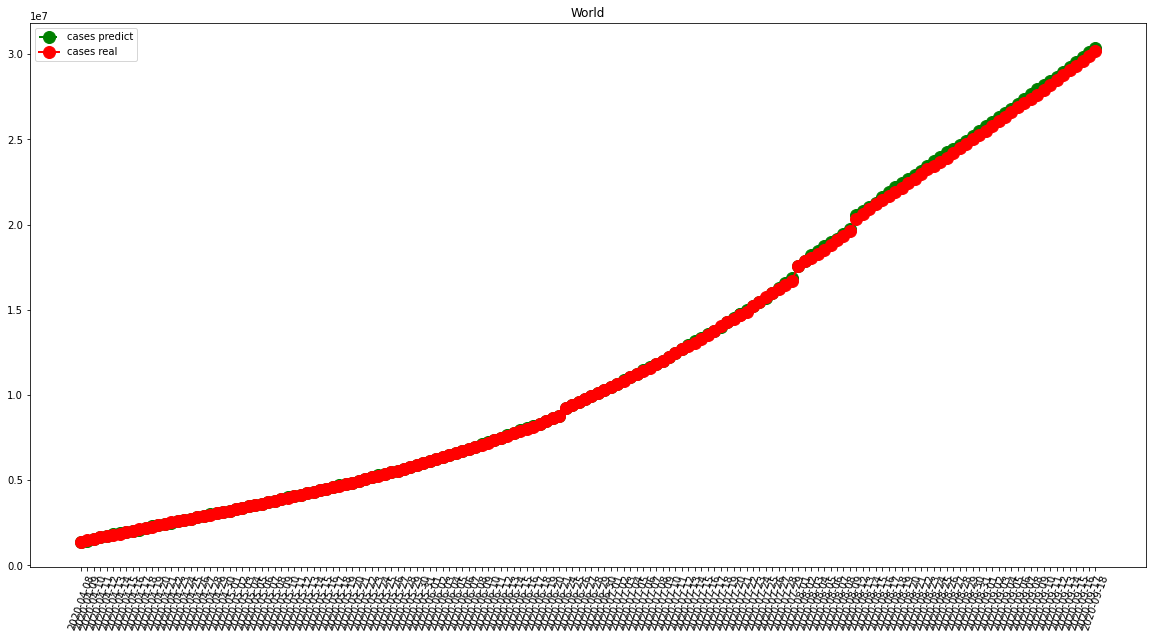

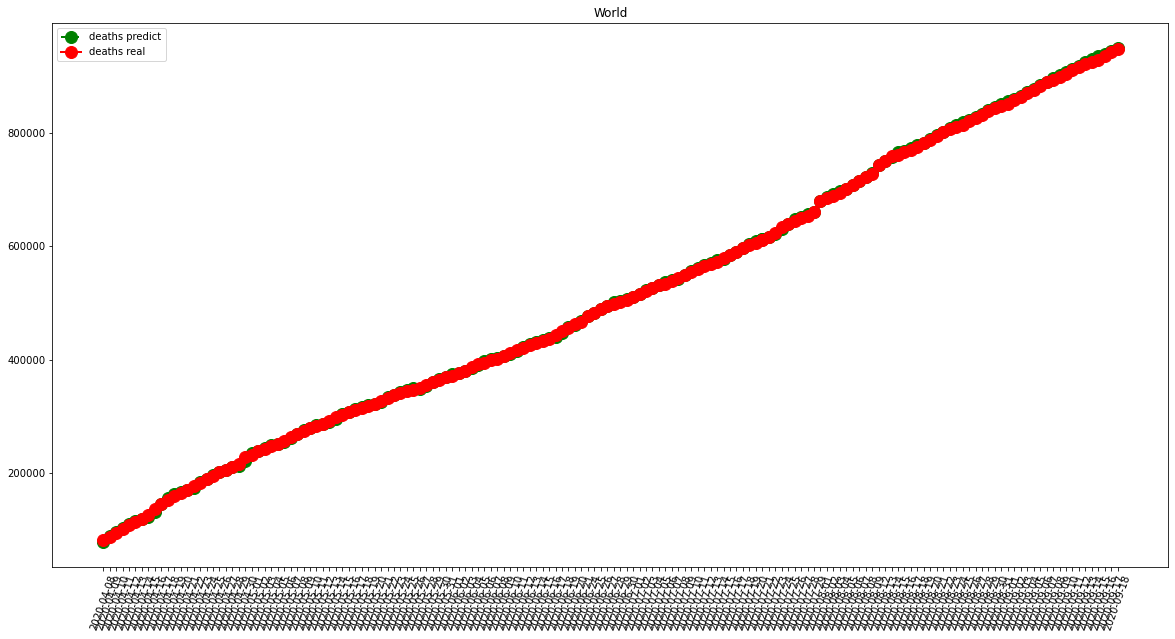

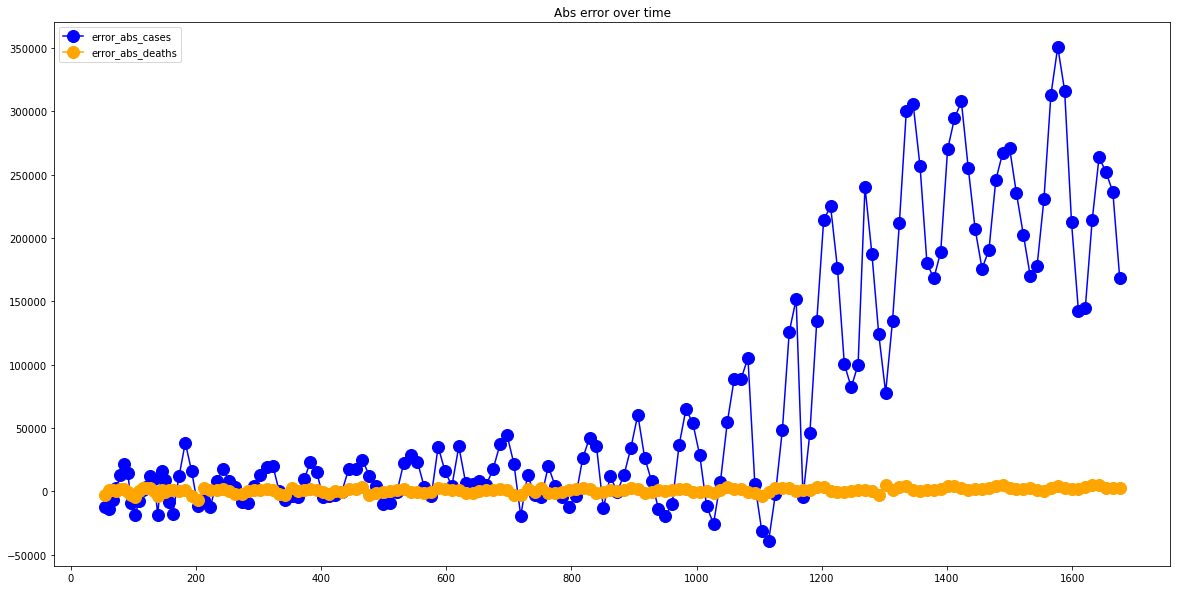

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1124.8579881656806
RMSE =  1652.8667851546463
-- France performances for deaths --
MAE =  112.49112426035504
RMSE =  258.1696497408967


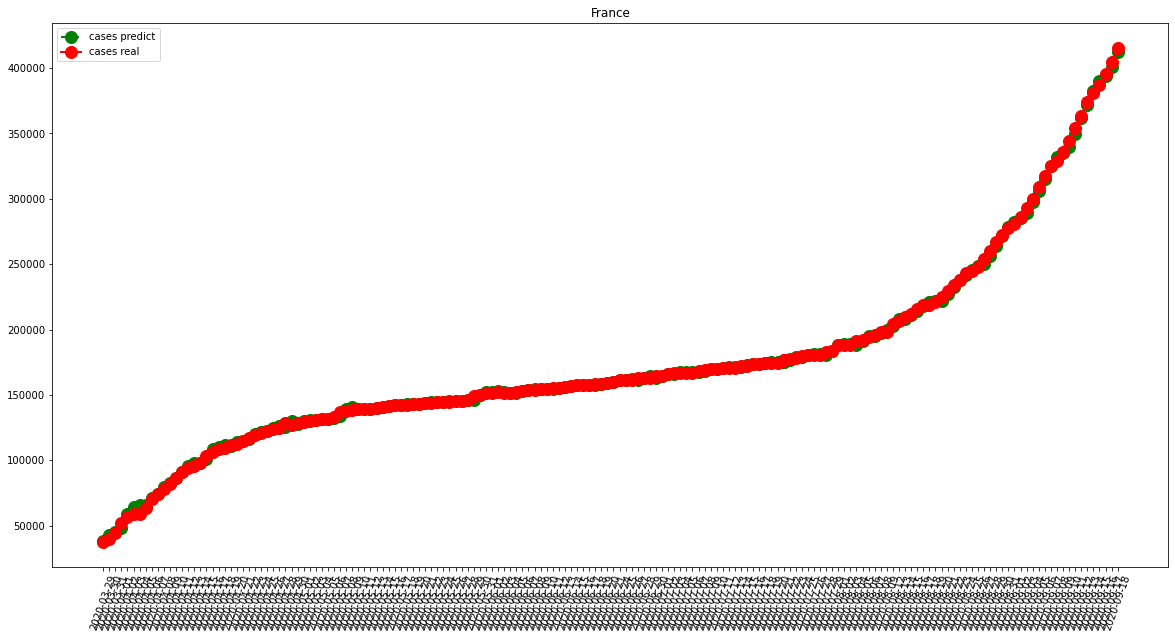

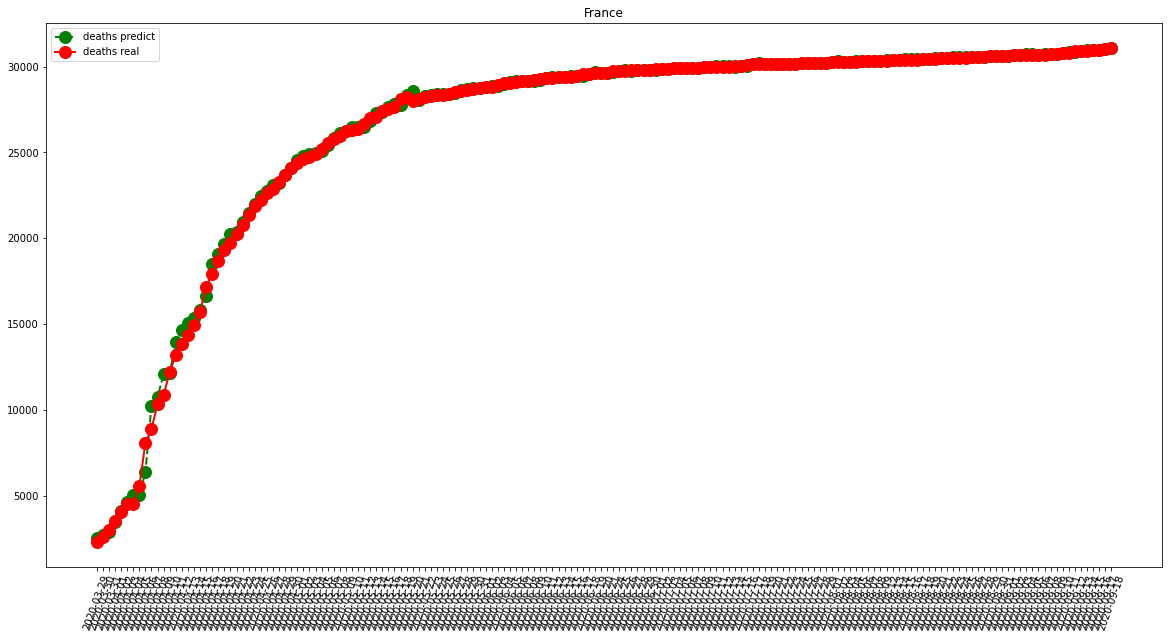

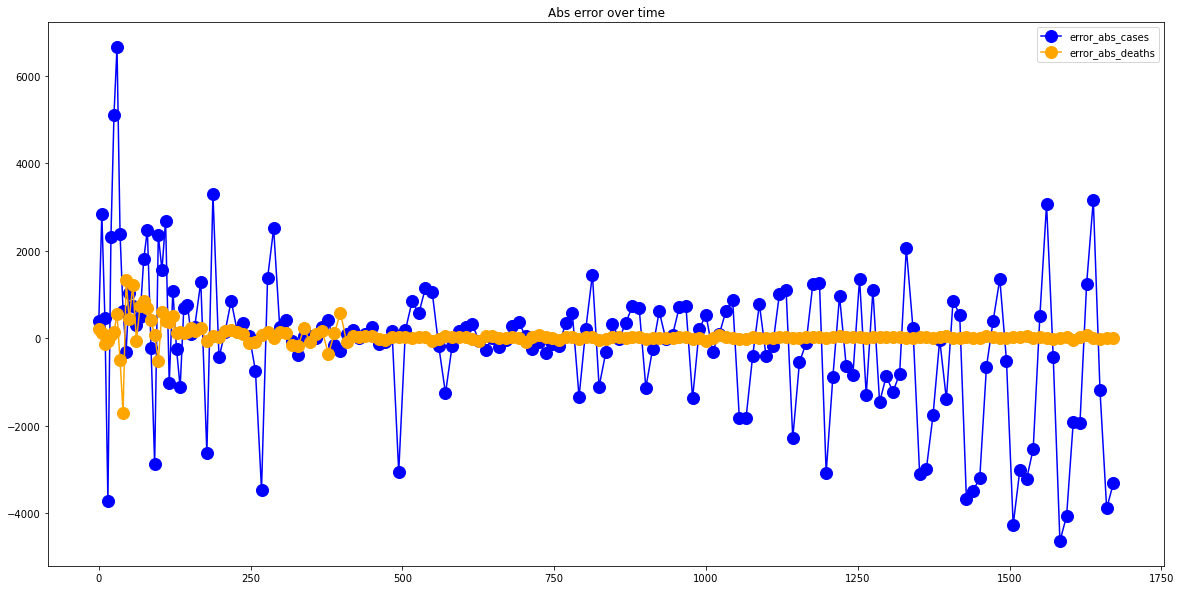

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  304.7573964497041
RMSE =  447.98191795715155
-- Italy performances for deaths --
MAE =  67.6508875739645
RMSE =  228.4138126788422


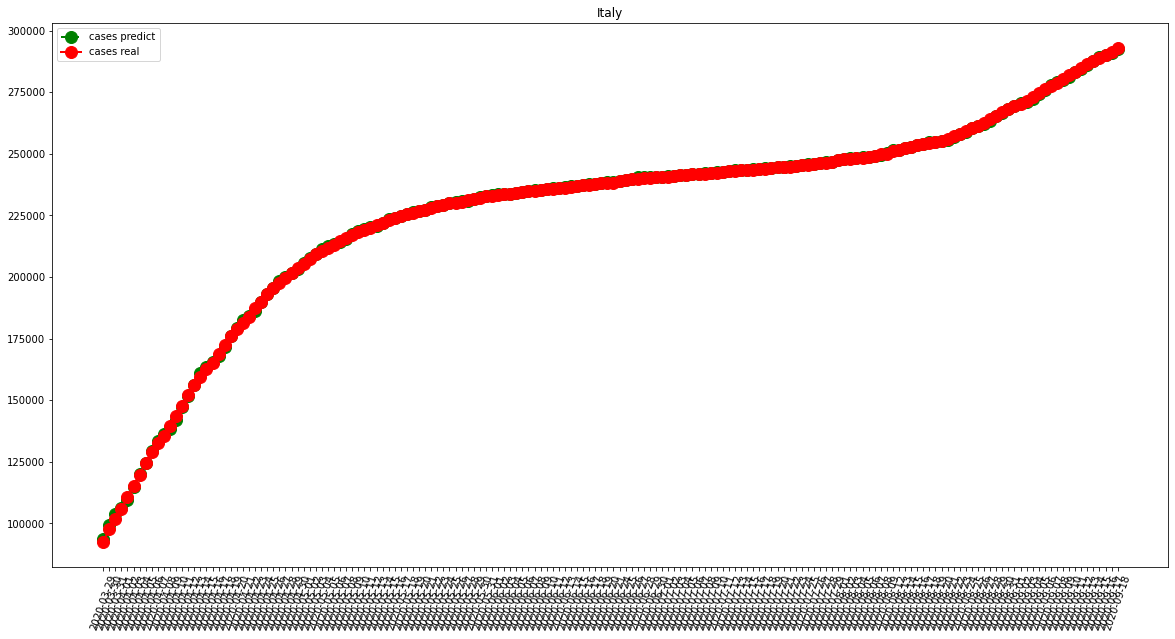

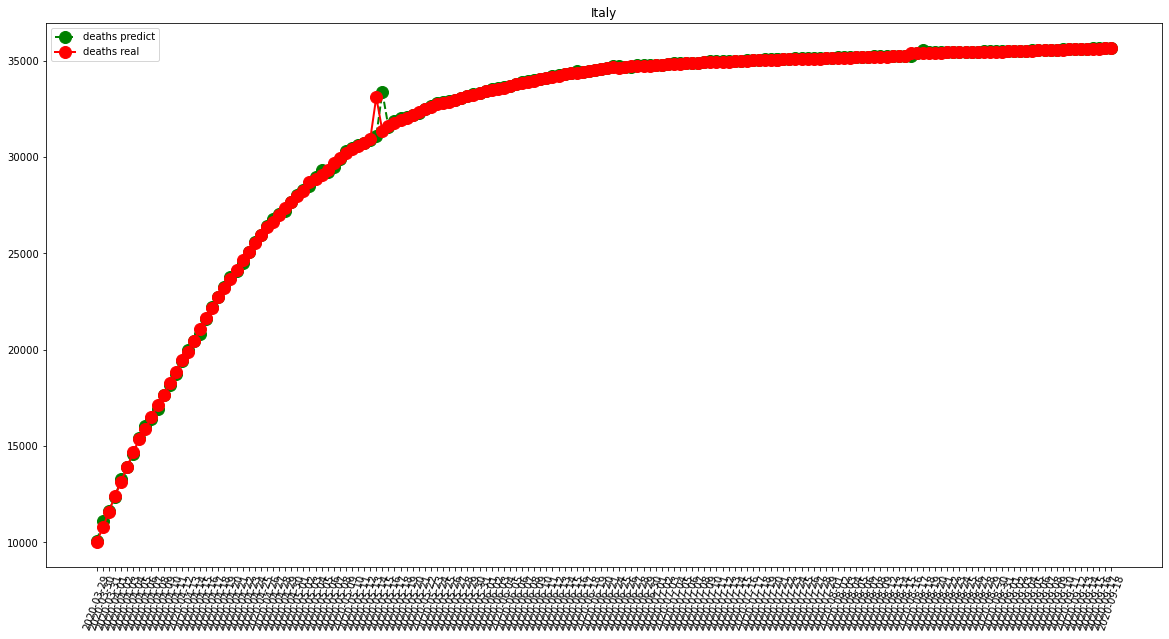

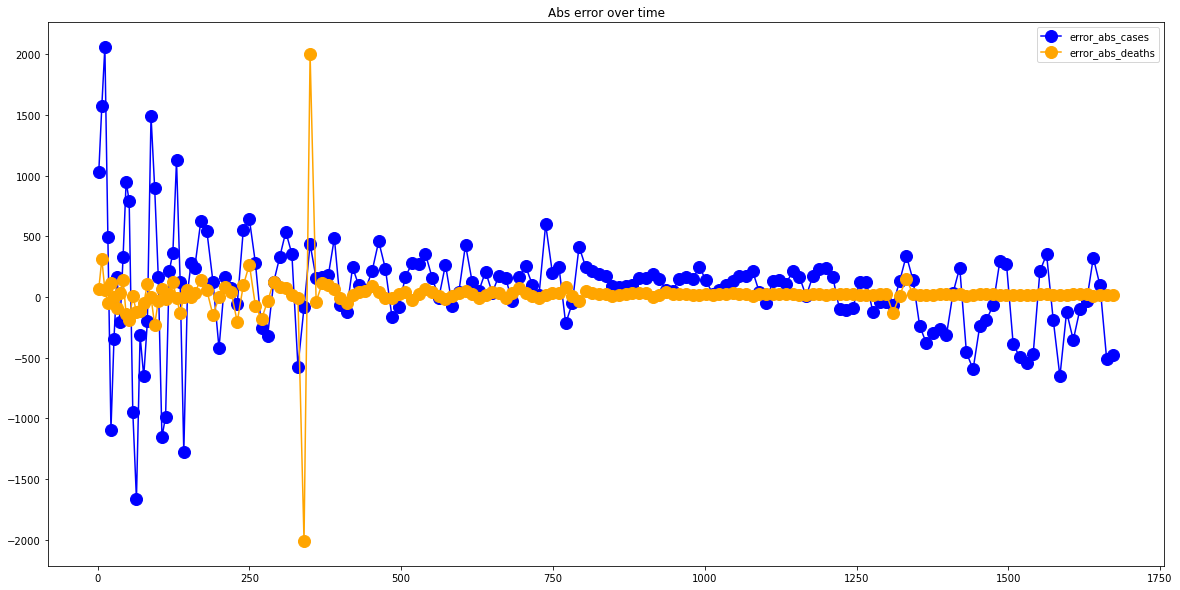

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2460.0828402366865
RMSE =  4817.451029957181
-- Spain performances for deaths --
MAE =  120.39644970414201
RMSE =  313.68301755587373


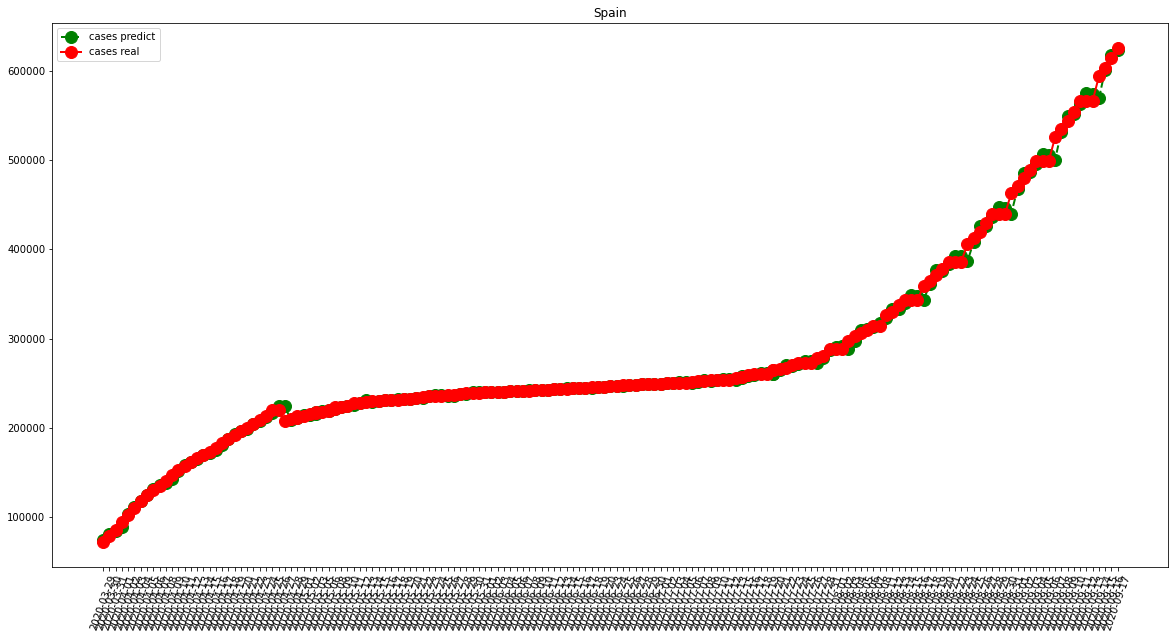

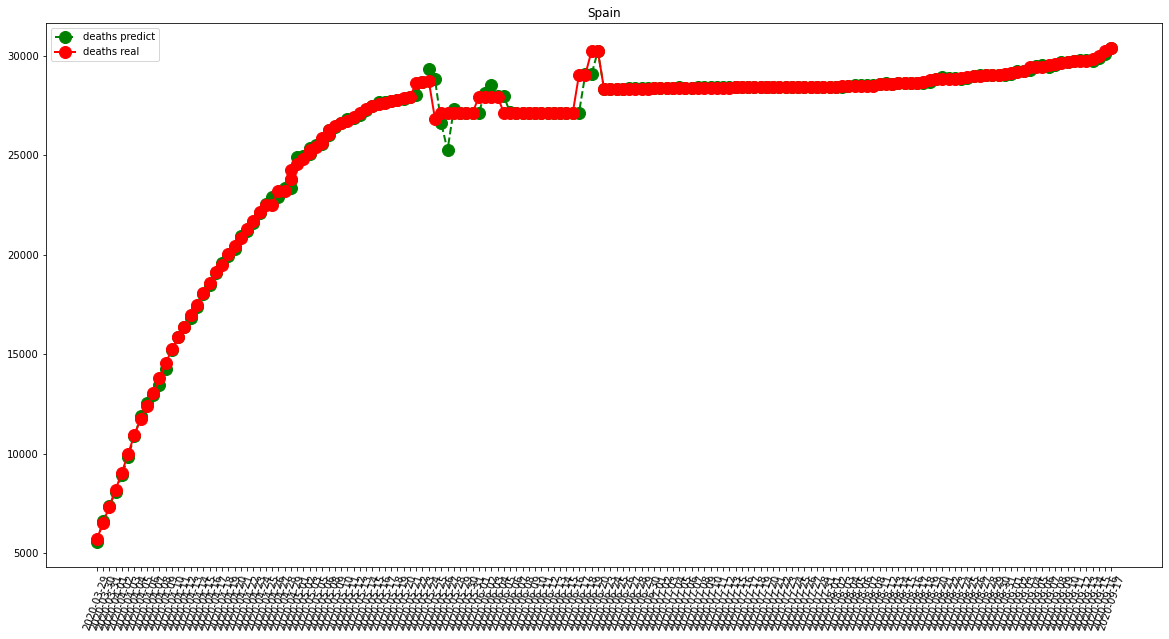

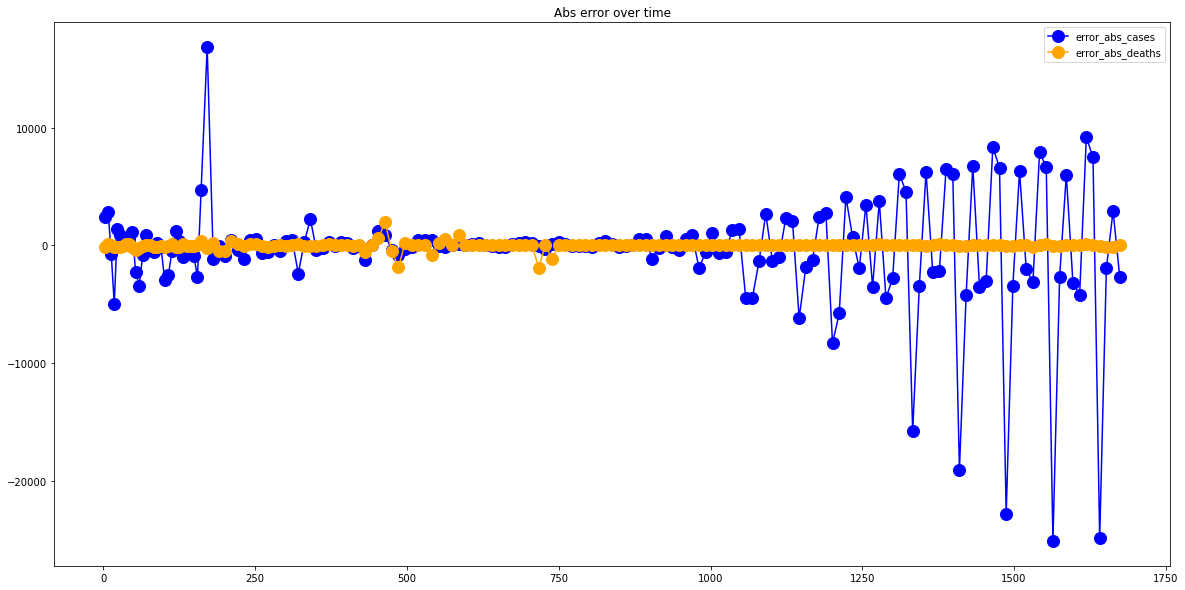

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  15275.834319526628
RMSE =  22909.29945000372
-- United States performances for deaths --
MAE =  482.3076923076923
RMSE =  675.6244098574787


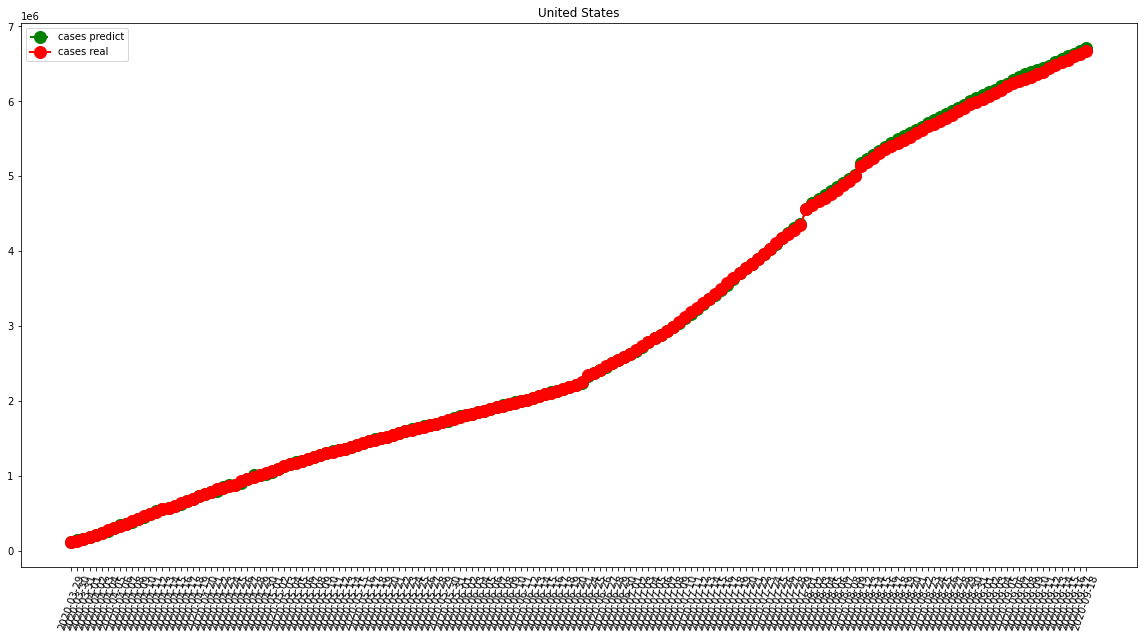

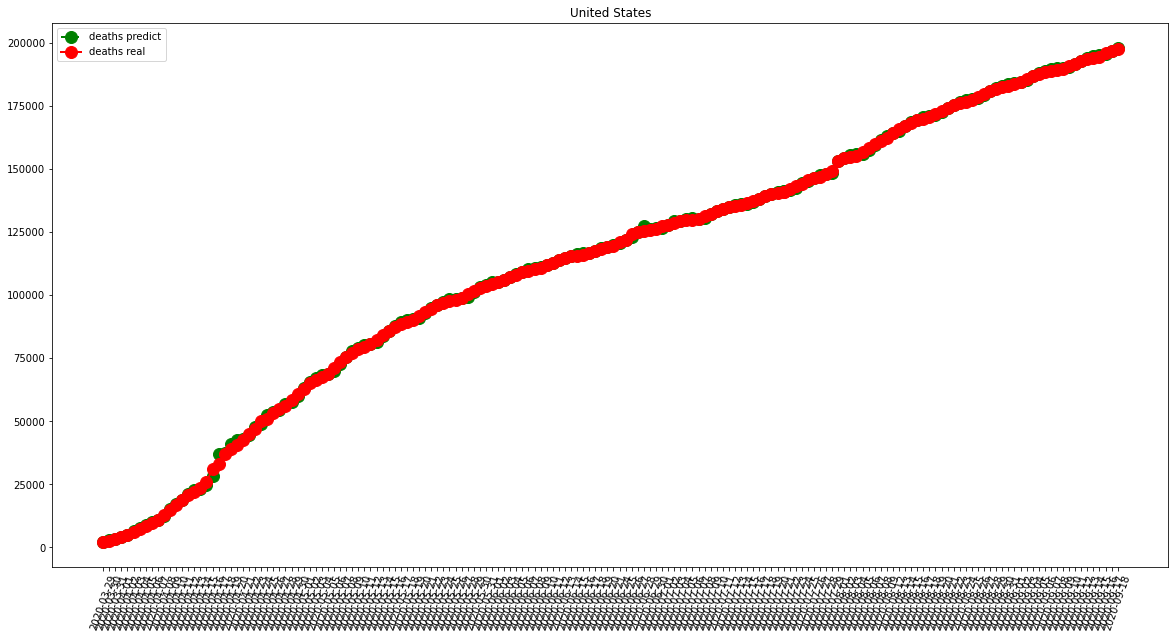

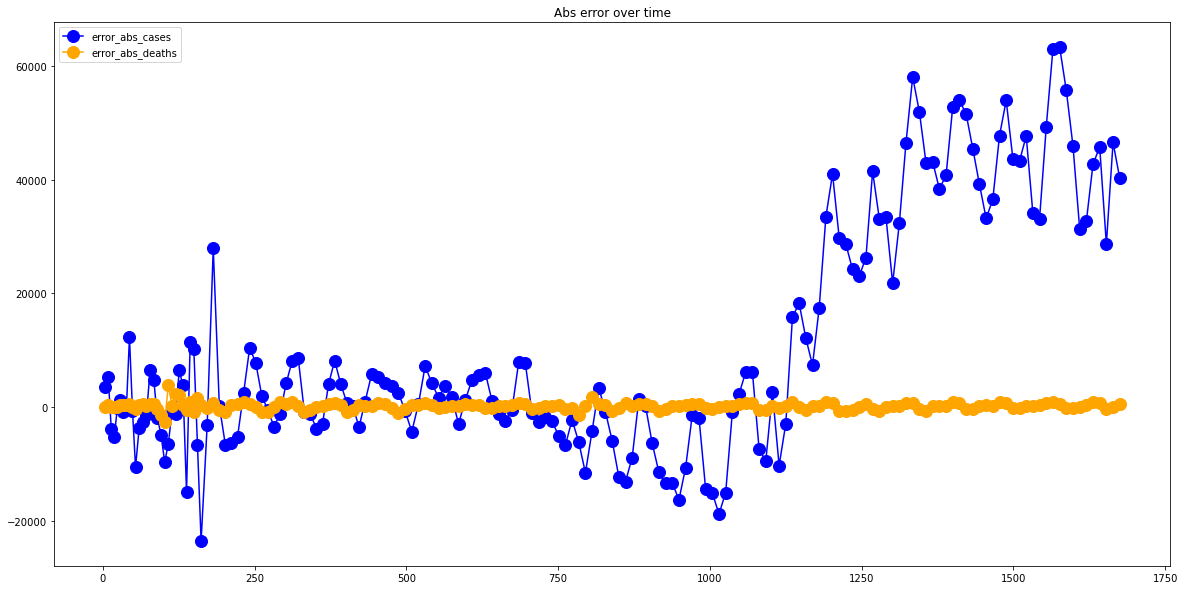

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  60.124260355029584
RMSE =  91.85050240961891
-- China performances for deaths --
MAE =  25.159763313609467
RMSE =  120.7981836926034


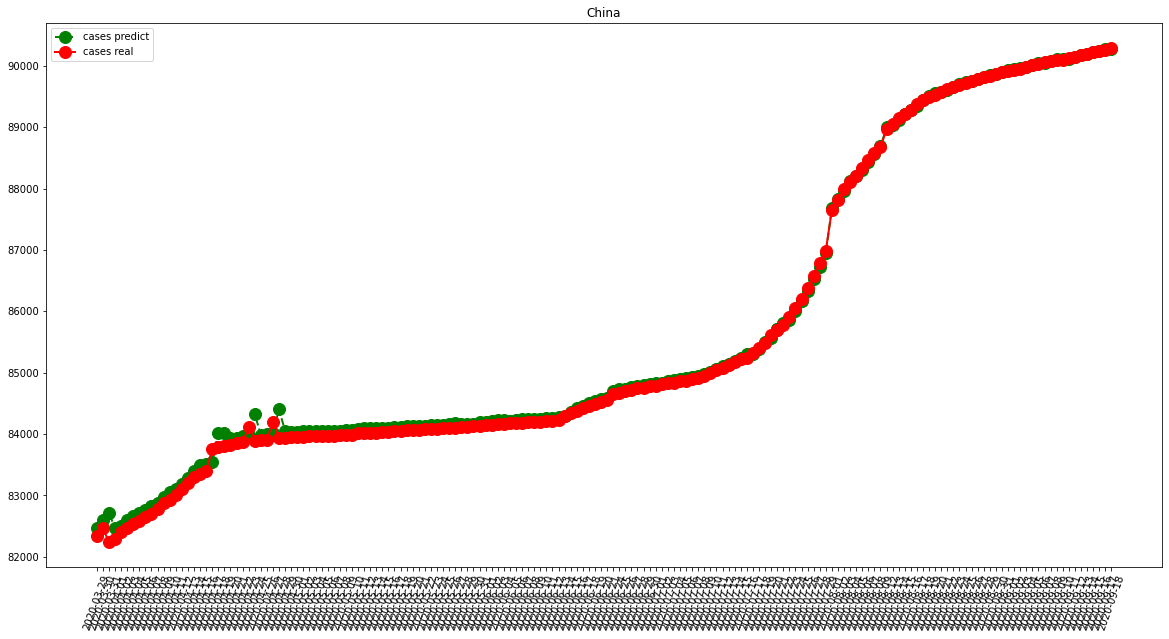

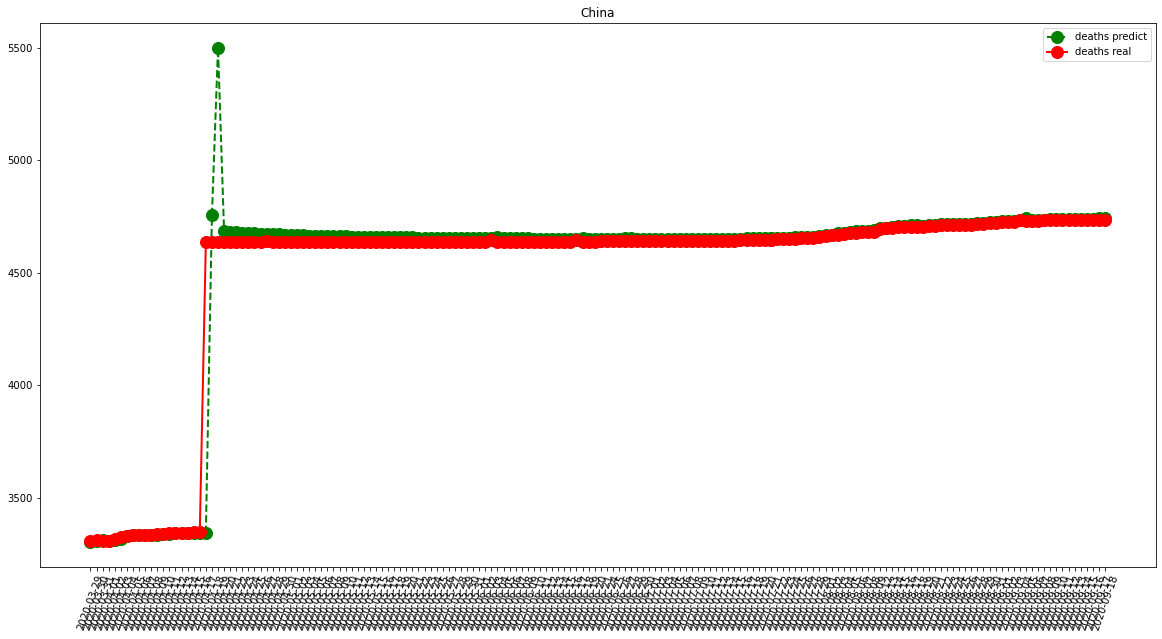

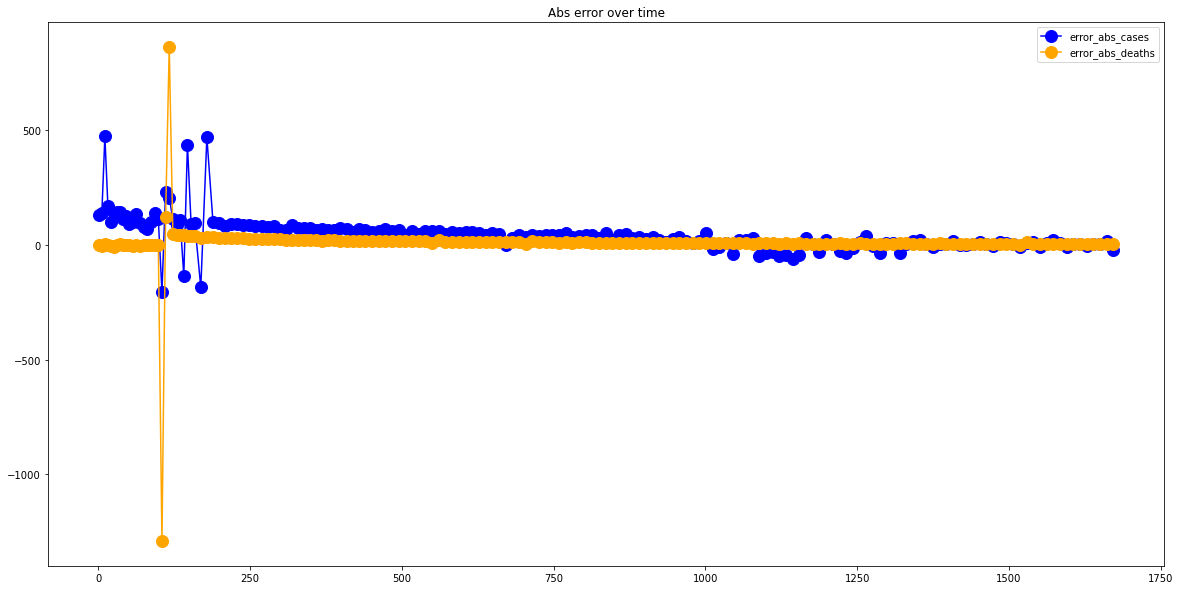

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1015.4539007092199
RMSE =  3534.4241588626246
-- United Kingdom performances for deaths --
MAE =  218.07801418439718
RMSE =  718.7866401391676


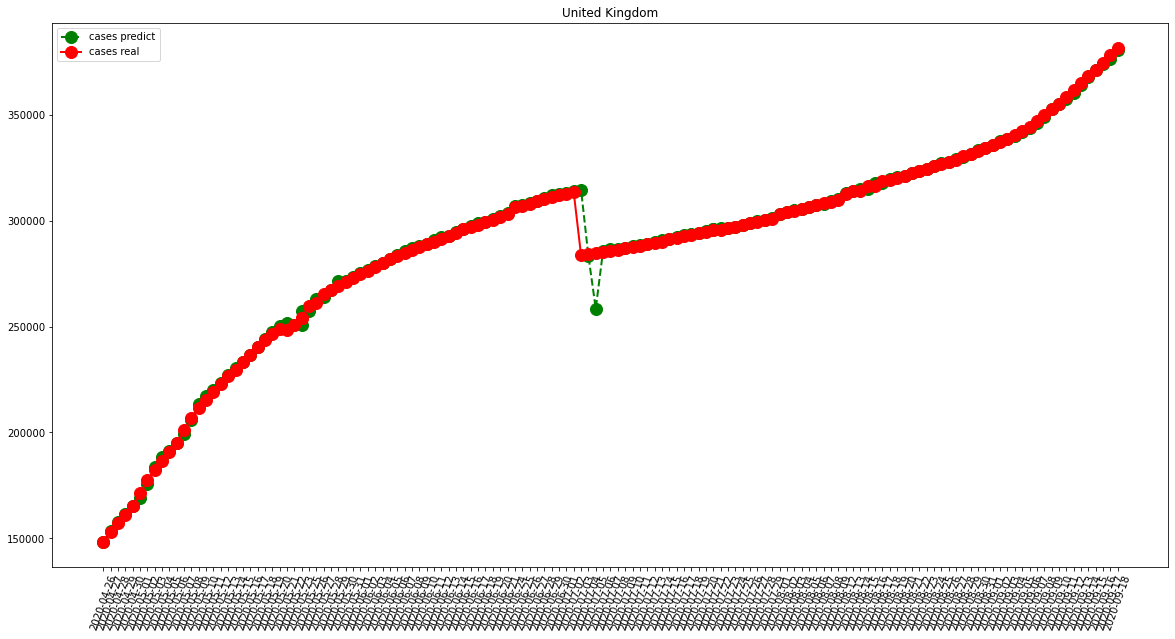

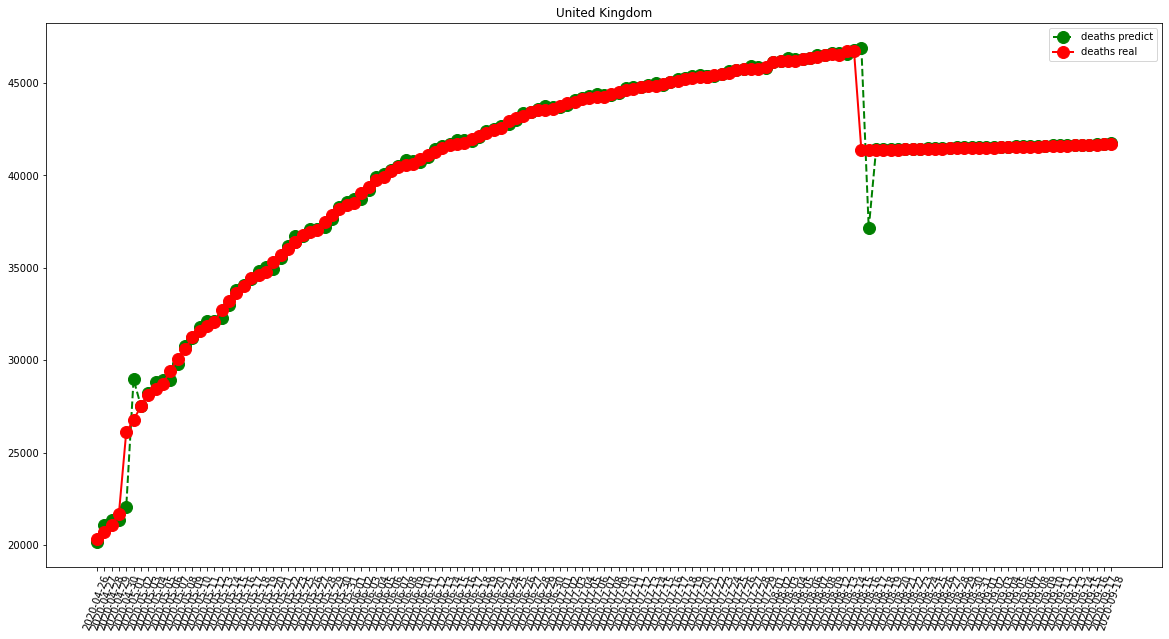

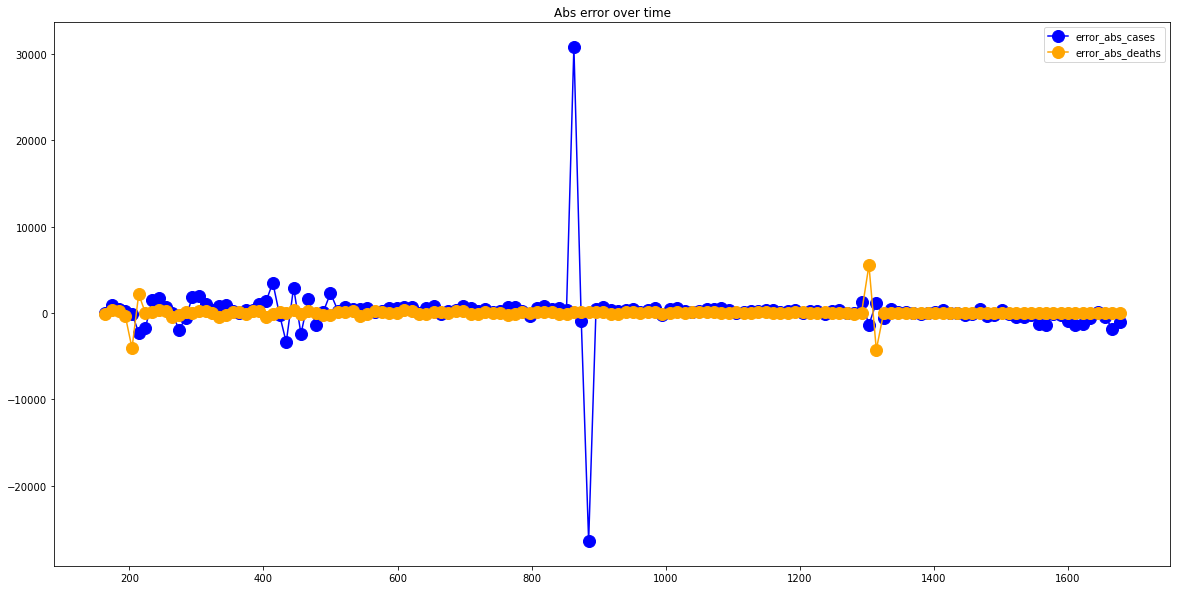

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  413.16312056737587
RMSE =  584.3293543253163
-- Germany performances for deaths --
MAE =  19.22695035460993
RMSE =  37.10049606825545


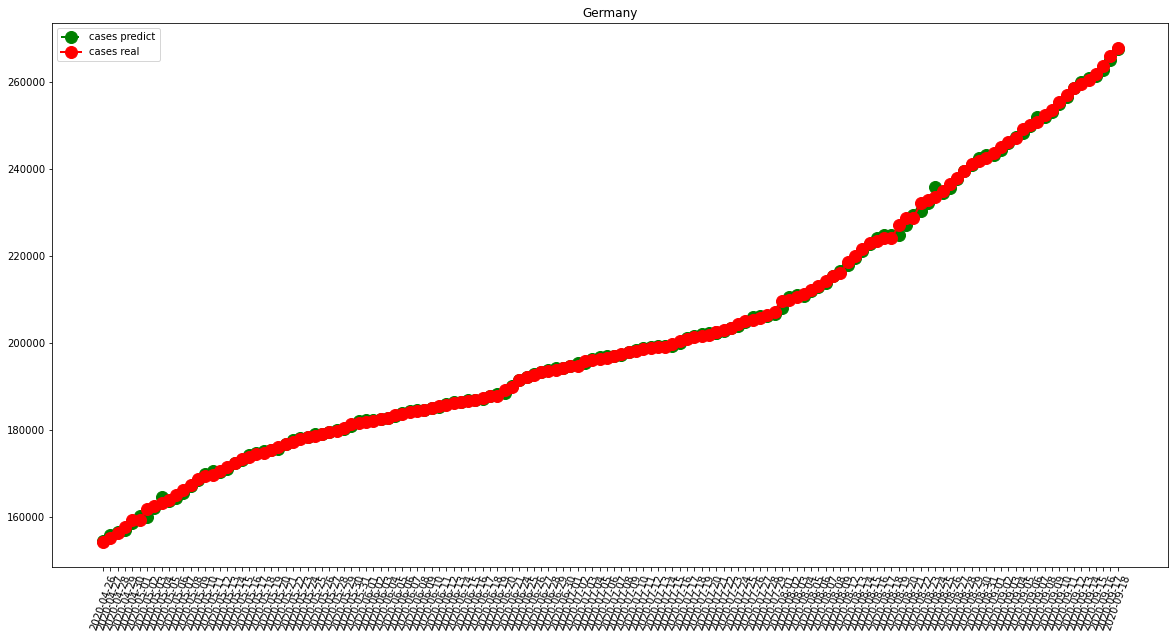

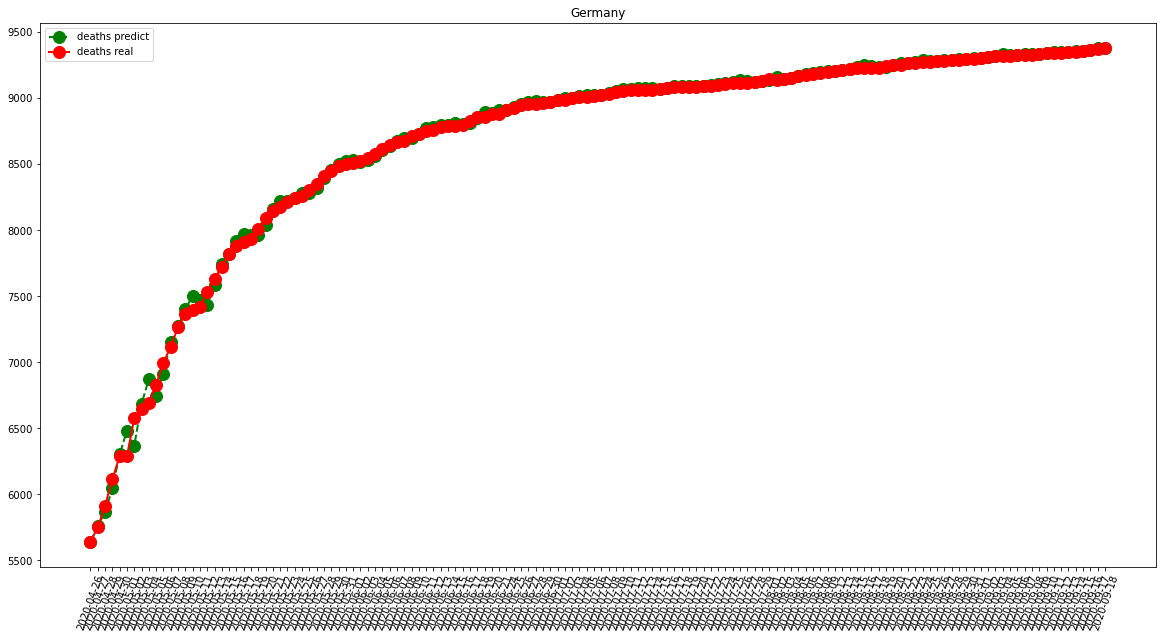

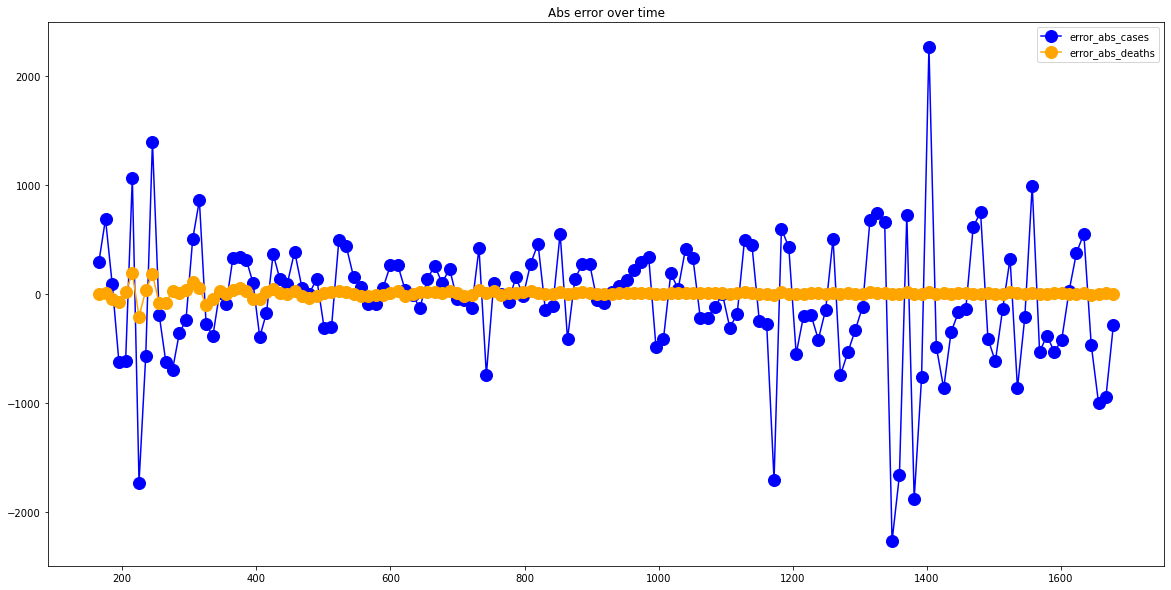

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  886.7730496453901
RMSE =  1241.7937466503276
-- Iran performances for deaths --
MAE =  51.91489361702128
RMSE =  85.94753471394195


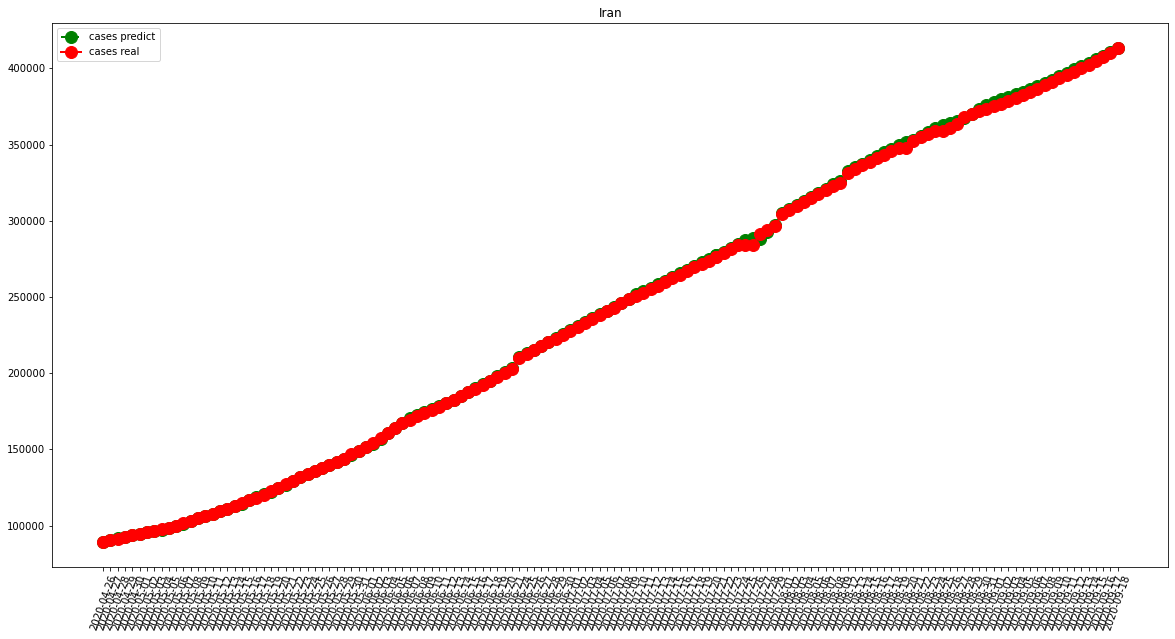

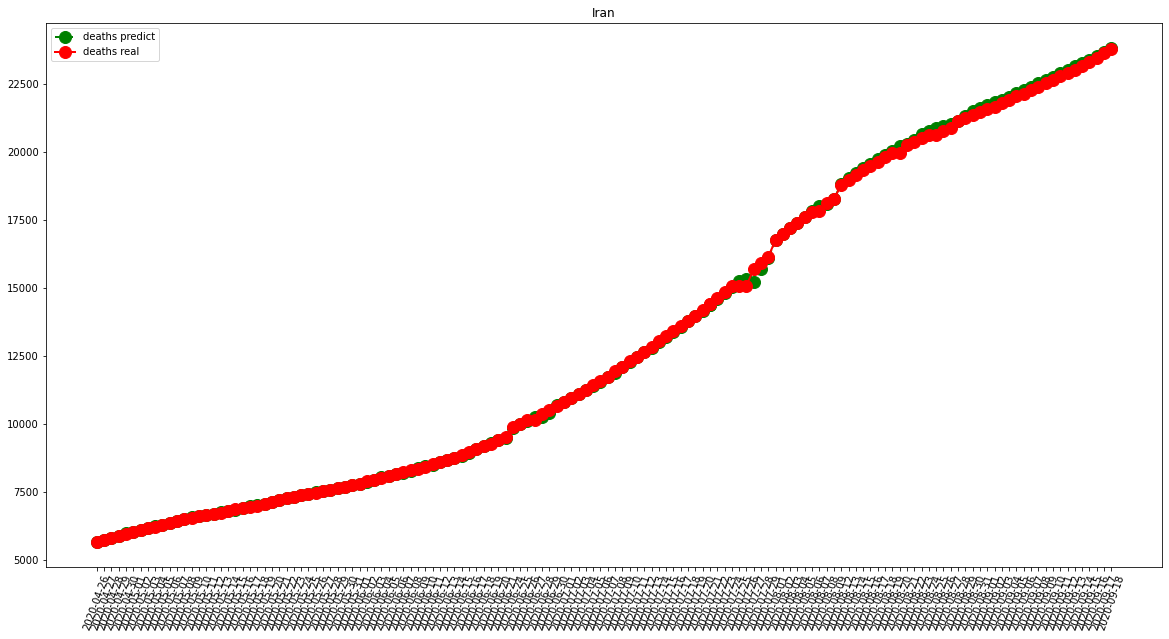

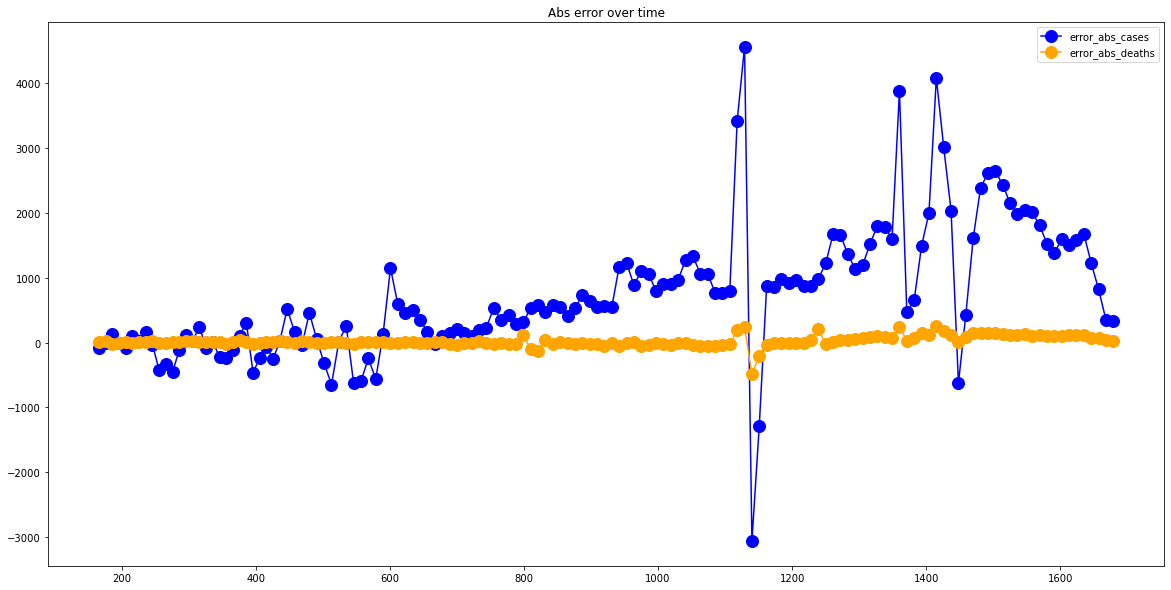

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  218.82269503546098
RMSE =  329.8456763590603
-- Turkey performances for deaths --
MAE =  15.957446808510639
RMSE =  85.68365038478701


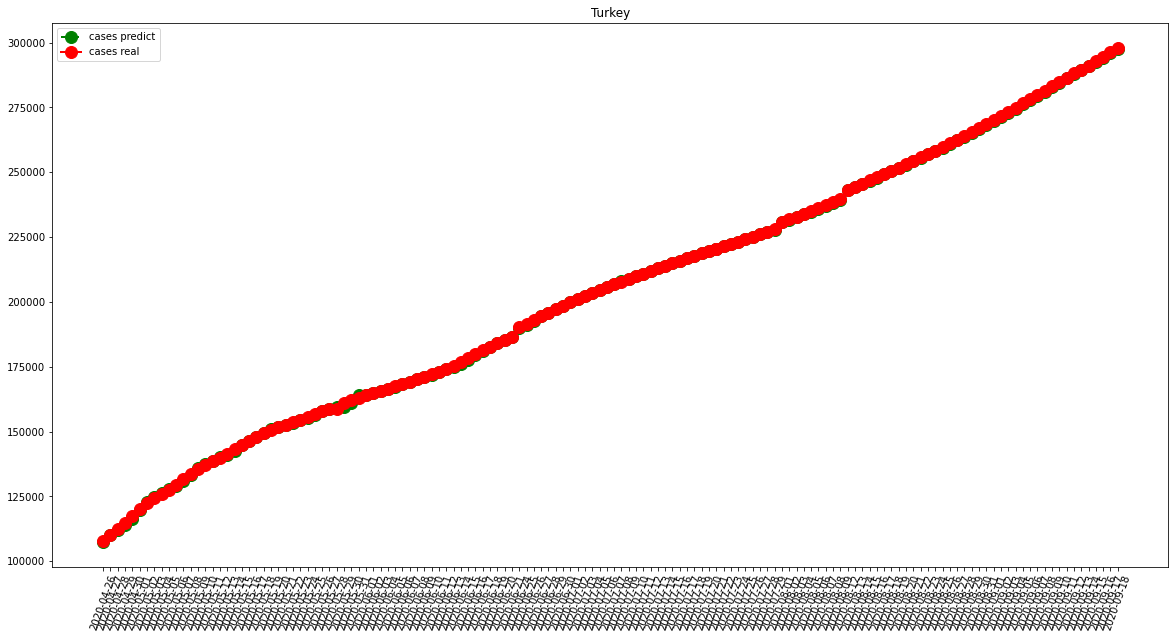

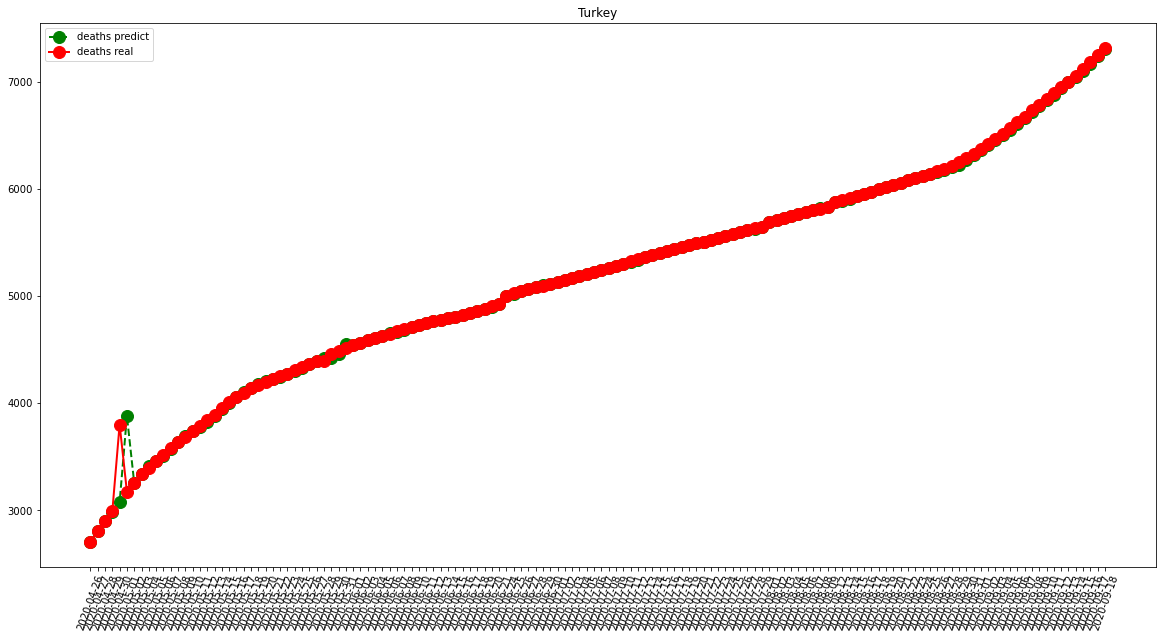

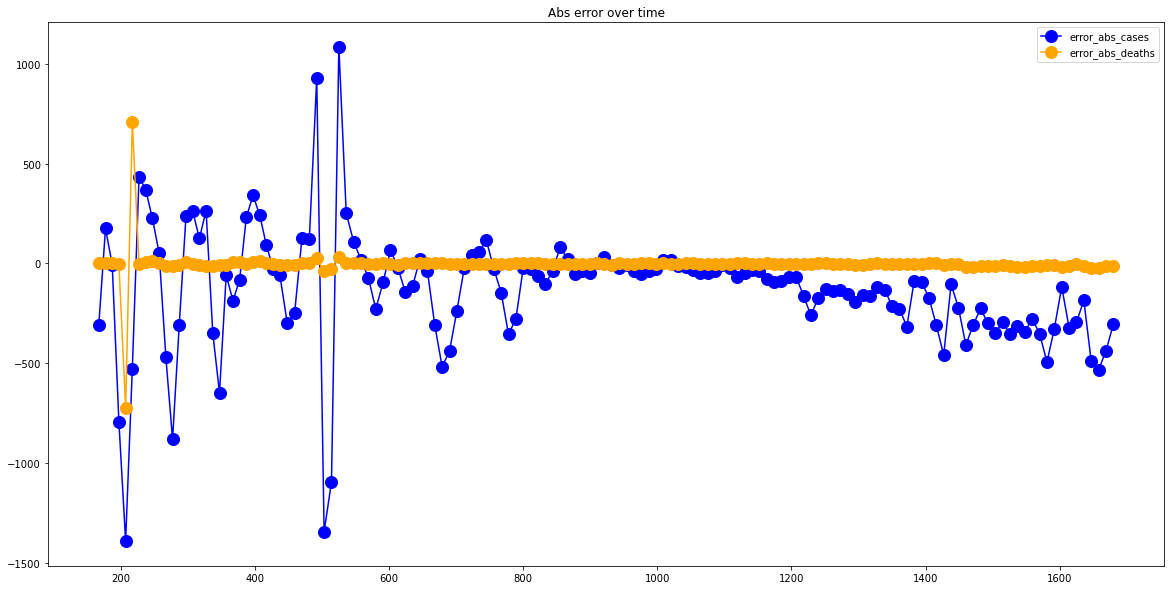

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  16050.254385964912
RMSE =  21248.669762079102
-- Brazil performances for deaths --
MAE =  478.359649122807
RMSE =  583.5309564992953


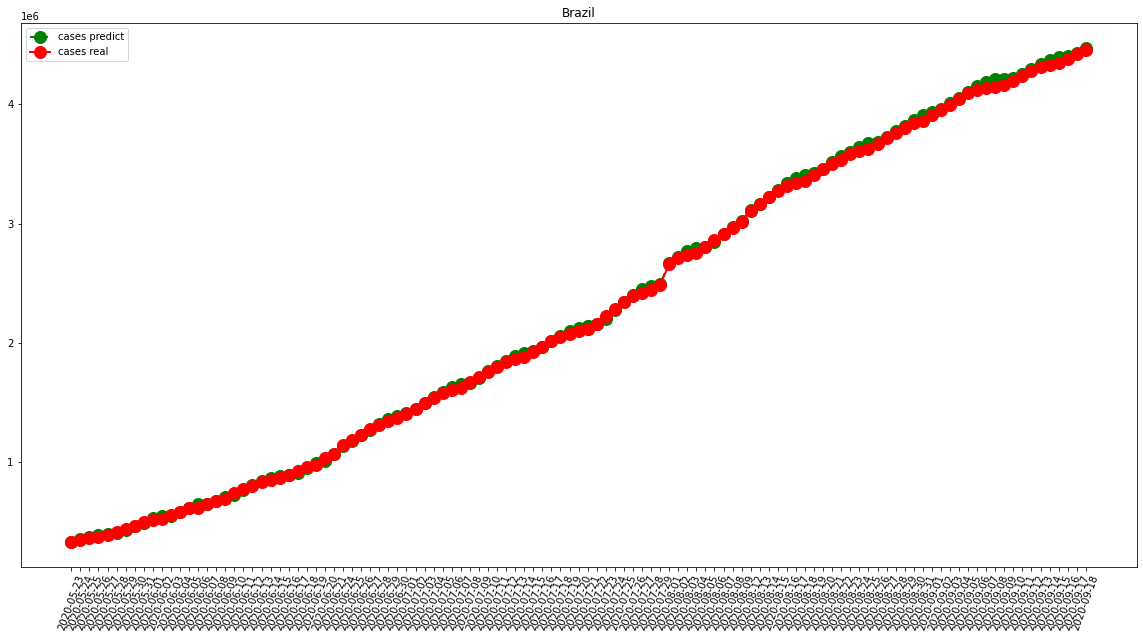

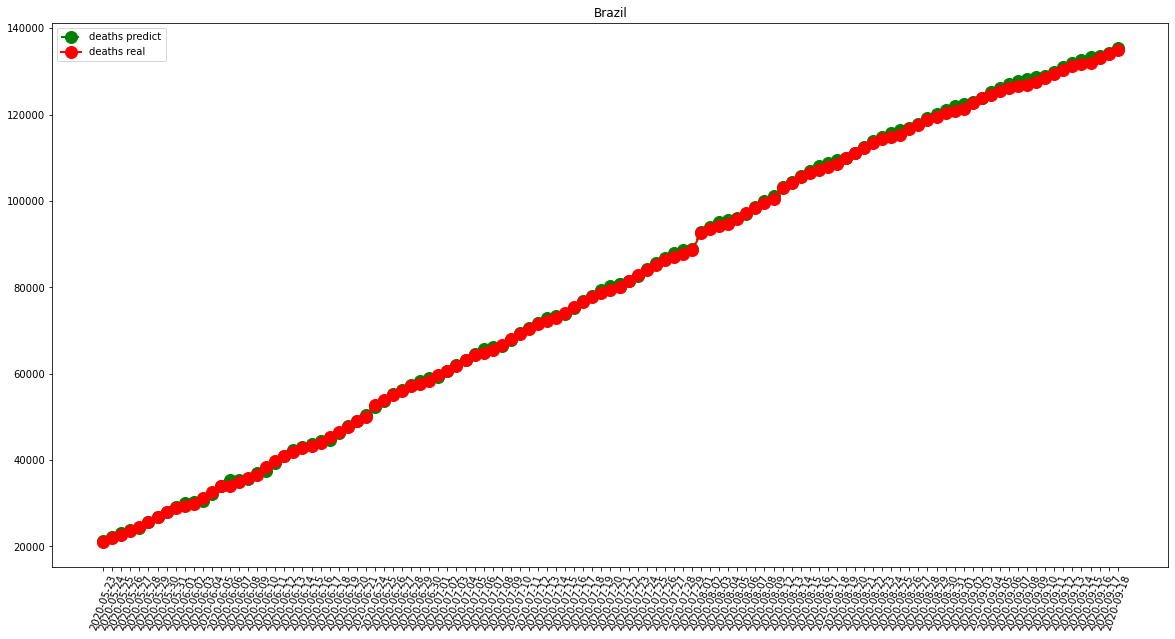

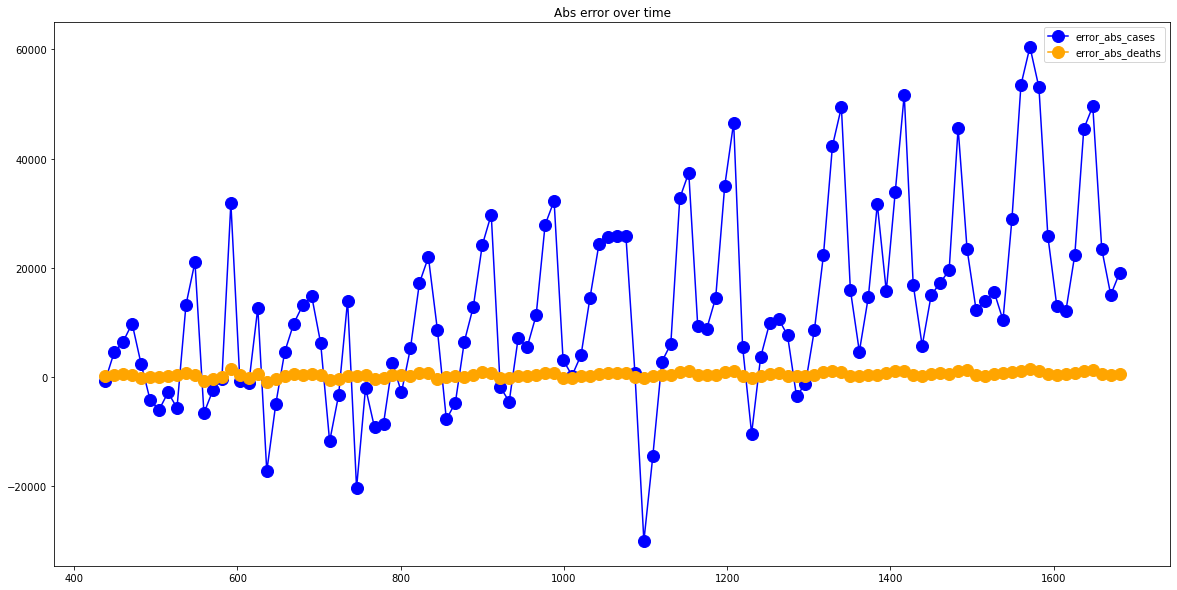

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)